In [1]:
# Authenticating to Twitter via Tweepy
import tweepy
import keys

# Authenticate to Twitter
auth = tweepy.OAuth1UserHandler(keys.consumer_key, keys.consumer_secret, keys.access_token, keys.access_token_secret)

# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True)

In [2]:
# Get a user
user = api.get_user(screen_name='@salah_elfarissi')

type(user)

tweepy.models.User

In [3]:
# Get a user followers
followers = []

cursor = tweepy.Cursor(api.get_followers, screen_name='@salah_elfarissi')

# Get 10 followers
for follower in cursor.items(10):
    followers.append(follower.screen_name)

print('Followers:', ', '.join(sorted(followers, key=lambda x: x.lower())))

Followers: 0Madliife, celebrityae, el_atassi, GeoLinux88, happyevr420, HoudaHarmouche, iyeh_ali, jawharoddine, MohamedAssarra3, PythonMaps


In [4]:
# Get a user friends
friends = []

cursor = tweepy.Cursor(api.get_friends, screen_name='@salah_elfarissi')

# Get 10 friends
for friend in cursor.items(10):
    friends.append(friend.screen_name)

print('Friends:', ', '.join(sorted(friends, key=lambda x: x.lower())))

Friends: AbirStellar, aouragh_1, code, CoingraphNews, GretaThunberg, jawharoddine, kellychang_, LayahHeilpern, marouane53, sama


In [5]:
# Get a user timeline
timeline = []

cursor = tweepy.Cursor(api.user_timeline, screen_name='@salah_elfarissi')

# Get 10 tweets
for tweet in cursor.items(10):
    timeline.append(tweet.text)

print('Timeline:', ', '.join(sorted(timeline, key=lambda x: x.lower())))

Timeline: @chrieke @UP42_ Hi. I'm a geomatics engineer with background in python analytics. I would love to get more details. Best., @elonmusk 🇲🇦🇲🇦🇲🇦, @Mehdi_Cheracher An unbreakable logic., @tjukanov Thank God., RT @naval: Either create wealth or a passive income, or become a monk, or do what you love more than money.

What remains is taming the min…, RT @SanjivSanghavi: Everyone should have a friend who has no idea what your job is and doesn’t care., RT @sundarpichai: Watching the scenes in Marrakech (one of the most beautiful cities that I have been to) is amazing. Historic moment - fir…, RT @swyx: Few shot learning, illustrated https://t.co/q0E4Ev9zTx, RT @warikoo: 1. Scared of saying no to people?

Instead of saying no (or worse, saying yes), ask for permission to say no.
"Is it ok if I s…, اطردِ الفراغ بالعملِ
--------
ص43 - كتاب لا تحزن


In [6]:
# Search for tweets using cursor
cursor = tweepy.Cursor(api.search_tweets, q='Earthquake', count=10)

# Get 10 tweets
tweets = []
for tweet in cursor.items(10):
    tweets.append(tweet.text)

for tweet in tweets:
    print(tweet)

RT @sahloul: This time it is #earthquake. https://t.co/avzGAKHdgn
RT @kamisatolendid: ❗️PLEASE SPREAD THIS AND BE OUR VOICE❗️

PAYPAL ACCOUNT: @RaksMayaUygun / m.uygun22@ejm.org
🔗:https://t.co/JTG4VTWrO3…
RT @KVNFEED: Turkiye has declared a fourth level alert state. The "level 4" alarm condition includes an international call for help. For th…
RT @BarzanSadiq: The impact of the powerful earthquake on the streets of #Gaziantep, southern #Turkey. https://t.co/MJOY0GlckY
RT @enversamedk: Alitaşı Mahallesi 1203 Sokak No 3 Adıyaman/Merkez Yapıcılar Ekmek yanı Elit Güzellik Merkezi üstü
Mehmet EROL

YARDIM EDİN…
RT @nytimes: A deadly earthquake struck Turkey on Monday, with millions of people in Syria, Lebanon and Israel also feeling the earth shake…
RT @MayadeenEnglish: #Breaking  | #Syrian Health Ministry: Death toll from #earthquake in #Aleppo, #Latakia, #Hama and #Tartus reaches 111…
RT @RamazanCASUK: SONDAKİKA...

Adıyaman'daki öğrenci evinde Halil İbrahim adındaki bir öğrencimiz daha s

In [7]:
# Find available trends
trends = api.available_trends()

In [8]:
# Get trends for a location
trends = api.get_place_trends(1)

In [9]:
from operator import itemgetter

trends_list = [t for t in trends[0]['trends'] if t['tweet_volume']]
trends_list.sort(key=itemgetter('tweet_volume'), reverse=True)

for trend in trends_list[:5]:
    print(trend['name'])

#GRAMMYs
#deprem
Beyoncé
Taylor
Harry Styles


In [10]:
# Trending topics in Paris
trends = api.get_place_trends(615702)

trends_list = [t for t in trends[0]['trends'] if t['tweet_volume']]
trends_list.sort(key=itemgetter('tweet_volume'), reverse=True)

for trend in trends_list[:5]:
    print(trend['name'])

#GRAMMYs
Gaziantep
Harry Styles
Adèle
BTS ARE UNTOUCHABLE


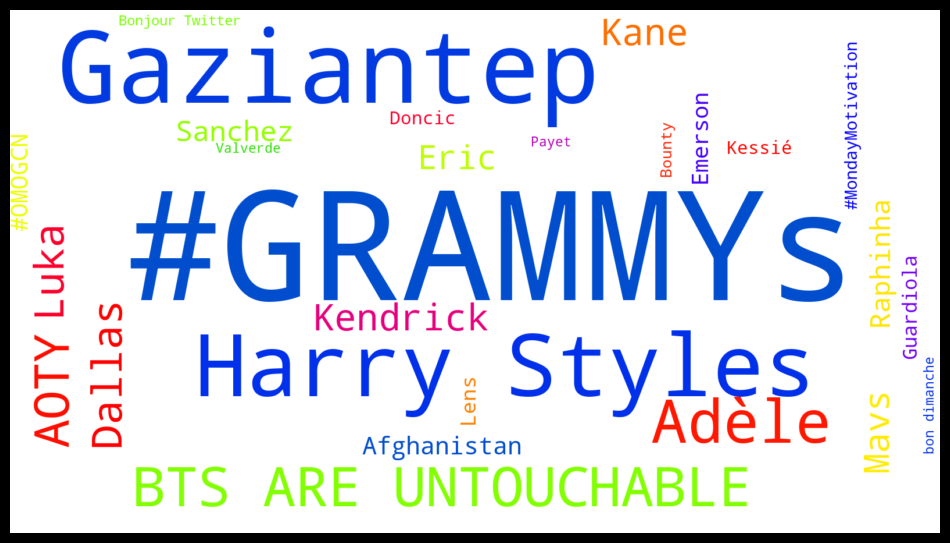

In [11]:
# Create a world cloud from trending topics in Paris

topics = {}

for trend in trends_list:
    topics[trend['name']] = trend['tweet_volume']

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, height=900, prefer_horizontal=0.5, min_font_size=10, colormap='prism', background_color='white').generate_from_frequencies(topics)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()